# U.S. Oil Production Performance Analysis (2015–2025)

## Project Overview
Oil production is a critical indicator of energy security and economic stability. This project analyzes historical U.S. oil production data across different land categories (Onshore and Offshore) to uncover production trends, performance patterns, and periods of decline between 2015 and 2025.

The analysis aims to provide insights into how production volumes have changed over time and how land categories contribute differently to total output.

## Objectives
- Analyze annual oil production trends in the U.S.
- Compare production performance between offshore and onshore locations.
- Identify periods of growth, decline, and volatility.
- Prepare the data for visualization in Power BI dashboards.


## 1. Importing Required Libraries
The following Python libraries are used for data manipulation, numerical operations, and data visualization throughout this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset Loading
The dataset contains historical U.S. oil and gas production records categorized by land type and year. It was loaded into a pandas DataFrame for exploration and analysis.

In [2]:
df = pd.read_csv('../data/oil_production_data.csv')

In [3]:
# Display the first few rows of the dataframe
df.head()

,Production Date,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Commodity,Disposition Code,Disposition Description,Volume
0,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0
1,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,"14,508,756"
2,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,"1,207,520"
3,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,"487,324"
4,01/01/2015,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,"114,808"


### Dataset Structure
The dataset includes the following key columns:
- **Production Date**: Production date (month and year of record)
- **Land Class**: Federal or Native American ownership.
- **Land Category**: Type of production location (onshore or offshore site).
- **State**: U.S state (blank for offshore).
- **County**: County name (blank for offshore).
- **FIPS Code**: County FIPS code.
- **Offshore Region**: Offshore area: Alaska, Gulf or Pacific (blank for onshore).
- **Commodity**: Oil (bbl) or Gas (Mcf).
- **Disposition Code**: Numeric code for disposition type.
- **Disposition Description**: Text describing disposition
- **Volume**: Volume of oil produced.

In [4]:
# Summary statistics of the dataframe
print(df.describe())

# Display the shape of the dataframe
print(f"Dataframe shape: {df.shape}")

# Display column names
print(f"Column names: {df.columns.tolist()}")

           FIPS Code  Disposition Code
count  454200.000000     470830.000000
mean    33246.875359         18.445779
std     16471.270398         14.210678
min      1003.000000          1.000000
25%     22027.000000         10.000000
50%     35045.000000         17.000000
75%     48225.000000         25.000000
max     56045.000000         69.000000
Dataframe shape: (470830, 11)
Column names: ['Production Date', 'Land Class', 'Land Category', 'State', 'County', 'FIPS Code', 'Offshore Region', 'Commodity', 'Disposition Code', 'Disposition Description', 'Volume']


## 3. Business & Policy Questions

This analysis is guided by key business and policy-driven questions aimed at understanding
U.S. oil production performance, decline patterns, and regional contributions.

**1. How is U.S. oil production trending over time?**  
This question examines whether overall oil production is increasing, stable, or declining,
and identifies periods of significant change that may signal structural shifts in production.

**2. Is oil production declining faster onshore or offshore?**  
This explores differences in production behavior between onshore and offshore operations,
highlighting potential implications for investment, regulation, and infrastructure planning.

**3. Which states contribute the most to total U.S. oil production?**  
This identifies the leading oil-producing states and assesses the concentration of production
across regions.

**4. Where are the most significant production declines occurring?**  
This focuses on identifying specific years, land categories, or regions experiencing the
largest drops in production.

**5. What do these production trends imply for future energy planning?**  
This synthesizes observed patterns to inform long-term energy policy considerations and
strategic planning.


## 4. Data Cleaning and Preparation

To ensure consistency and ease of analysis, column names were standardized by converting them to lowercase and replacing spaces with underscores. The data types were also reviewed to confirm that numerical and date fields were correctly formatted.
The year column was converted to a datetime format, while production volume was ensured to be numeric for accurate analysis.

In [5]:
# Rename columns for consistency
df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

In [6]:
# Display column names after renaming
print(f"Renamed column names: {df.columns.tolist()}")

Renamed column names: ['production_date', 'land_class', 'land_category', 'state', 'county', 'fips_code', 'offshore_region', 'commodity', 'disposition_code', 'disposition_description', 'volume']


In [7]:
# Display data types of each column
print(df.dtypes)

production_date             object
land_class                  object
land_category               object
state                       object
county                      object
fips_code                  float64
offshore_region             object
commodity                   object
disposition_code             int64
disposition_description     object
volume                      object
dtype: object


From the code results, we observe that:

- `production_date` is of type `object`, but it should be **datetime**.  
- `volume` is of type `object`, but it should be **numeric**.  

We will **convert these columns** to the correct data types to ensure proper analysis and calculations.


In [8]:
# Converting the production_date column to datetime
df['production_date'] = pd.to_datetime(df['production_date'])

In [9]:
# Ensuring the volume column is numeric
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

In [10]:
df

,production_date,land_class,land_category,state,county,fips_code,offshore_region,commodity,disposition_code,disposition_description,volume
0,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Alaska,Gas (Mcf),1,Sales-Royalty Due-MEASURED,0.0
1,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),1,Sales-Royalty Due-MEASURED,NaN
2,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),1,Sales-Royalty Due-MEASURED,NaN
3,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Gas (Mcf),4,Sales-Royalty Due-Not Measured,NaN
4,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Gas (Mcf),4,Sales-Royalty Due-Not Measured,NaN
...,...,...,...,...,...,...,...,...,...,...,...
470825,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),62,Vented Gas Well Gas - Royalty Not Due,0.0
470826,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),66,Flared Oil Well Gas - Royalty Due,0.0
470827,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),67,Flared Gas Well Gas - Royalty Due,0.0
470828,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),68,Vented Oil Well Gas - Royalty Due,0.0


For this project, our focus is on **oil production**.  
Therefore, we will **filter the dataset to include only oil records**.

In [11]:
# filtering the dataset for oil production only
oil_df = df[df['commodity'].str.contains('oil', case=False, na=False)]
oil_df.shape
oil_df

,production_date,land_class,land_category,state,county,fips_code,offshore_region,commodity,disposition_code,disposition_description,volume
43,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Alaska,Oil (bbl),1,Sales-Royalty Due-MEASURED,NaN
44,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),1,Sales-Royalty Due-MEASURED,NaN
45,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),1,Sales-Royalty Due-MEASURED,NaN
46,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),4,Sales-Royalty Due-Not Measured,NaN
47,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),4,Sales-Royalty Due-Not Measured,0.0
...,...,...,...,...,...,...,...,...,...,...,...
470825,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),62,Vented Gas Well Gas - Royalty Not Due,0.0
470826,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),66,Flared Oil Well Gas - Royalty Due,0.0
470827,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),67,Flared Gas Well Gas - Royalty Due,0.0
470828,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),68,Vented Oil Well Gas - Royalty Due,0.0


In [12]:
# Summary statistics of oil production data
print(oil_df.describe())

                     production_date      fips_code  disposition_code  \
count                         235415  227100.000000     235415.000000   
mean   2020-02-07 07:46:47.744620800   33246.875359         18.445779   
min              2015-01-01 00:00:00    1003.000000          1.000000   
25%              2017-07-01 00:00:00   22027.000000         10.000000   
50%              2020-02-01 00:00:00   35045.000000         17.000000   
75%              2022-10-01 00:00:00   48225.000000         25.000000   
max              2025-05-01 00:00:00   56045.000000         69.000000   
std                              NaN   16471.288530         14.210693   

              volume  
count  215362.000000  
mean       17.674418  
min      -996.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       999.000000  
std       107.144290  


The summary statistics indicate that the minimum value in the `volume` column is negative, which is not physically meaningful in the context of oil production. This occurs because the dataset includes both **production and disposition**, where negative values represent reporting adjustments or corrections rather than actual oil output.

To ensure the analysis reflects true production trends, all rows with negative volume values are excluded from the analysis.


In [13]:
# Identifying negative oil production volumes
negative_volumes = oil_df[oil_df['volume'] < 0]

# Excluding negative volumes from the dataset
oil_df = oil_df[oil_df['volume'] >= 0]

# Summary statistics after removing negative volumes
print(oil_df.describe())

                     production_date      fips_code  disposition_code  \
count                         211473  205244.000000     211473.000000   
mean   2020-02-02 14:51:22.912711936   33010.539110         19.218803   
min              2015-01-01 00:00:00    1003.000000          1.000000   
25%              2017-07-01 00:00:00   22017.000000         10.000000   
50%              2020-01-01 00:00:00   35045.000000         17.000000   
75%              2022-09-01 00:00:00   48203.000000         26.000000   
max              2025-05-01 00:00:00   56045.000000         69.000000   
std                              NaN   16425.511924         14.562474   

              volume  
count  211473.000000  
mean       20.928251  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       999.000000  
std       100.160981  


In [14]:
# Checking for missing values
print(oil_df.isnull().sum())

production_date                 0
land_class                      0
land_category                   0
state                        6229
county                       6229
fips_code                    6229
offshore_region            207926
commodity                       0
disposition_code                0
disposition_description         0
volume                          0
dtype: int64


From the results of the code, we observe missing values in the following columns: `state`, `county`, `fips_code`, `offshore_region`, and `volume`.

**Analysis of Missing Values**
- **`state`, `county`, `fips_code`**:  
  All missing values correspond to **Offshore production records**. Offshore wells do not belong to any state or county, and their FIPS codes are often missing. This is expected.
  
- **`offshore_region`**:  
  All missing values correspond to **Onshore production records**. Onshore wells do not have an offshore region. This is also expected.

**Handling Strategy**
- We will **keep the missing values** in `state`, `county`, `fips_code`, and `offshore_region` because they are expected and meaningful.
- For **`volume`**, we will **remove rows with missing values**. Production volume cannot be inferred, and keeping these rows would bias decline calculations.


In [15]:
oil_df = oil_df.dropna(subset=['volume'])
oil_df

,production_date,land_class,land_category,state,county,fips_code,offshore_region,commodity,disposition_code,disposition_description,volume
47,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),4,Sales-Royalty Due-Not Measured,0.0
48,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),5,"Sales-Royalty Not Due, Recovered Injection-MEA...",0.0
53,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),11,Transferred to Facility,95.0
54,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),11,Transferred to Facility,0.0
55,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),12,Transferred to Facility-Returned to L/A,0.0
...,...,...,...,...,...,...,...,...,...,...,...
470825,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),62,Vented Gas Well Gas - Royalty Not Due,0.0
470826,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),66,Flared Oil Well Gas - Royalty Due,0.0
470827,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),67,Flared Gas Well Gas - Royalty Due,0.0
470828,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),68,Vented Oil Well Gas - Royalty Due,0.0


Since we know that oil production occurs in **two locations/regions** (onshore and offshore), we can create a new column called `location_type`.  

This column will indicate the **location of production**, effectively **turning previously missing data into useful information**.


In [16]:
oil_df['location_type'] = oil_df['offshore_region'].apply(
    lambda x: 'Offshore' if pd.notnull(x) else 'Onshore'
)
oil_df

,production_date,land_class,land_category,state,county,fips_code,offshore_region,commodity,disposition_code,disposition_description,volume,location_type
47,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),4,Sales-Royalty Due-Not Measured,0.0,Offshore
48,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),5,"Sales-Royalty Not Due, Recovered Injection-MEA...",0.0,Offshore
53,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),11,Transferred to Facility,95.0,Offshore
54,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Pacific,Oil (bbl),11,Transferred to Facility,0.0,Offshore
55,2015-01-01,Federal,Offshore,NaN,NaN,NaN,Offshore Gulf,Oil (bbl),12,Transferred to Facility-Returned to L/A,0.0,Offshore
...,...,...,...,...,...,...,...,...,...,...,...,...
470825,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),62,Vented Gas Well Gas - Royalty Not Due,0.0,Onshore
470826,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),66,Flared Oil Well Gas - Royalty Due,0.0,Onshore
470827,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),67,Flared Gas Well Gas - Royalty Due,0.0,Onshore
470828,2025-05-01,Native American,Onshore,NaN,NaN,NaN,NaN,Oil (bbl),68,Vented Oil Well Gas - Royalty Due,0.0,Onshore


In [17]:
# Confirming the changes made
oil_df.isnull().sum()
oil_df.shape

(211473, 12)

In [18]:
# Creating time-based features
oil_df['year'] = oil_df['production_date'].dt.year
oil_df['month'] = oil_df['production_date'].dt.month
oil_df['year_month'] = oil_df['production_date'].dt.to_period('M')

## 5. Exploratory Data Analysis
This section explores oil production trends over time and compares output across land categories.

### Oil Production Trend Over Time (Question 1)
The line chart below shows monthly oil production trends from 2015 to 2025. Periods of increase and decline are clearly visible, indicating fluctuations likely influenced by economic conditions, policy changes, and operational constraints.

In [19]:
monthly_oil = (
    oil_df
    .groupby('year_month')['volume']
    .sum()
    .reset_index()
)

monthly_oil['year_month'] = monthly_oil['year_month'].dt.to_timestamp()
monthly_oil

,year_month,volume
0,2015-01-01,37756.0
1,2015-02-01,41243.0
2,2015-03-01,37174.0
3,2015-04-01,43258.0
4,2015-05-01,39277.0
...,...,...
120,2025-01-01,29371.0
121,2025-02-01,26993.0
122,2025-03-01,29832.0
123,2025-04-01,30330.0


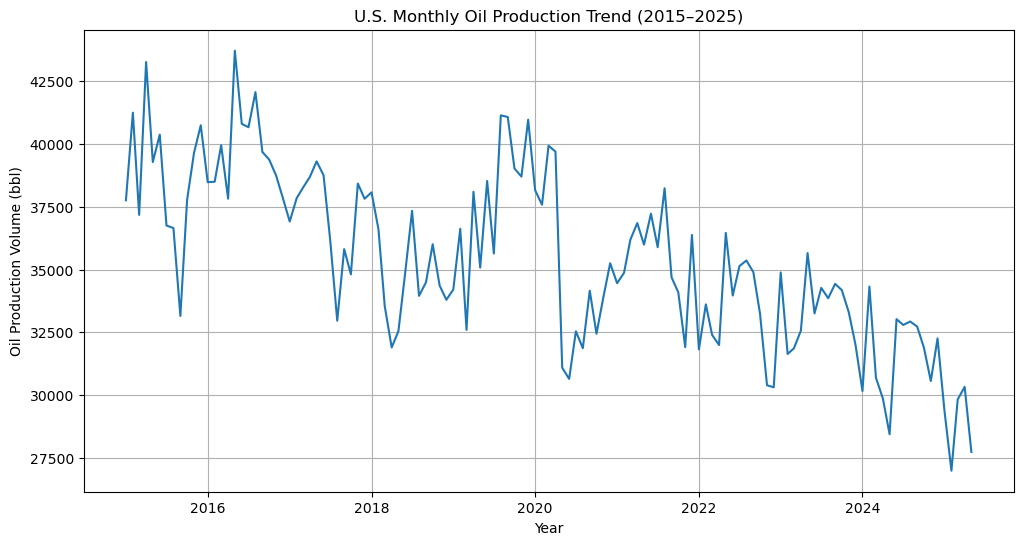

In [20]:
# Visualizing the monthly oil production trend

plt.figure(figsize=(12,6))
plt.plot(monthly_oil['year_month'], monthly_oil['volume'])
plt.title("U.S. Monthly Oil Production Trend (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Oil Production Volume (bbl)")
plt.grid(True)
plt.show()


**Insight:**  
U.S. oil production exhibits a sustained downward trend from 2015 to 2025, with noticeable short-term volatility and a pronounced decline beginning around 2020, indicating structural rather than temporary changes in production levels.

**Why it matters:**  
Distinguishing between short-term volatility and long-term decline is critical for production planning and investment decisions, as sustained declines signal increased risk and the need for strategic energy planning.


### Measuring Annual Production Growth and Decline (Question 1)

This analysis evaluates changes in total annual oil production to highlight growth trends and identify the first year of decline in overall output.


In [21]:
# Total annual oil production
yearly_oil = (
    oil_df
    .groupby('year')['volume']
    .sum()
    .reset_index()
    .rename(columns={'volume': 'total_volume'})
)

# Calculating year-on-year change and percentage change
yearly_oil['year_on_year_change'] = yearly_oil['total_volume'].diff()
yearly_oil['pct_change'] = yearly_oil['total_volume'].pct_change() * 100
yearly_oil

,year,total_volume,year_on_year_change,pct_change
0,2015,463794.0,NaN,NaN
1,2016,477624.0,13830.0,2.981927
2,2017,445706.0,-31918.0,-6.682663
3,2018,417531.0,-28175.0,-6.321432
4,2019,451639.0,34108.0,8.168974
5,2020,417271.0,-34368.0,-7.609617
6,2021,426763.0,9492.0,2.274781
7,2022,399580.0,-27183.0,-6.369577
8,2023,401892.0,2312.0,0.578608
9,2024,379694.0,-22198.0,-5.523374


From the results, we can see that `2025` has a very high `pct_change` value. This is likely because 2025 is a **partial year** in the dataset.

**Implications**
- The total volume in `2025` is artificially low.
- Year-over-year comparisons are biased.

**Next Steps**
- Verify the number of months recorded per year to confirm this hypothesis.
- If confirmed, exclude incomplete years from the analysis to ensure accurate comparisons.


In [22]:
# Counting the months per year
oil_df.groupby('year')['month'].nunique()

year
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2023    12
2024    12
2025     5
Name: month, dtype: int64

We can see that 2025 has only 5 months of data. So now to exclude the incomplete years from our analysis.

In [23]:
# Identifying years with complete data (12 months)
complete_years = (
    oil_df
    .groupby('year')['month']
    .nunique()
    .reset_index()
)

complete_years = complete_years[complete_years['month'] == 12]['year']

# Excluding incomplete years from yearly_oil
yearly_oil_clean = yearly_oil[yearly_oil['year'].isin(complete_years)]

In [24]:
# Recalculating percentage change after removing incomplete years
yearly_oil_clean['year_on_year_change'] = yearly_oil_clean['total_volume'].diff()
yearly_oil_clean['pct_change'] = yearly_oil_clean['total_volume'].pct_change() * 100
yearly_oil_clean

C:\Users\horsh\AppData\Local\Temp\ipykernel_19148\683528715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_oil_clean['year_on_year_change'] = yearly_oil_clean['total_volume'].diff()
C:\Users\horsh\AppData\Local\Temp\ipykernel_19148\683528715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_oil_clean['pct_change'] = yearly_oil_clean['total_volume'].pct_change() * 100


,year,total_volume,year_on_year_change,pct_change
0,2015,463794.0,NaN,NaN
1,2016,477624.0,13830.0,2.981927
2,2017,445706.0,-31918.0,-6.682663
3,2018,417531.0,-28175.0,-6.321432
4,2019,451639.0,34108.0,8.168974
5,2020,417271.0,-34368.0,-7.609617
6,2021,426763.0,9492.0,2.274781
7,2022,399580.0,-27183.0,-6.369577
8,2023,401892.0,2312.0,0.578608
9,2024,379694.0,-22198.0,-5.523374


**Insight:**  
The table shows year-on-year fluctuations in annual oil production, with multiple consecutive periods of decline, a brief recovery, and a renewed downward trend in recent years. Overall, production exhibits more contraction phases than sustained growth across the observed period.

**Why it matters:**    
Persistent year-over-year declines indicate structural weakening rather than cyclical variation, signaling elevated risk for long-term production planning, investment decisions, and energy policy formulation.



### Performance Comparison Between Onshore and Offshore Production (Question 2)

This analysis evaluates how oil production varies between onshore and offshore locations over time, providing insights into stability, volatility, and production dominance.


In [25]:
location_monthly = (
    oil_df
    .groupby(['year_month', 'location_type'])['volume']
    .sum()
    .reset_index()
)
location_monthly.head()

,year_month,location_type,volume
0,2015-01,Offshore,95.0
1,2015-01,Onshore,37661.0
2,2015-02,Offshore,448.0
3,2015-02,Onshore,40795.0
4,2015-03,Offshore,1153.0


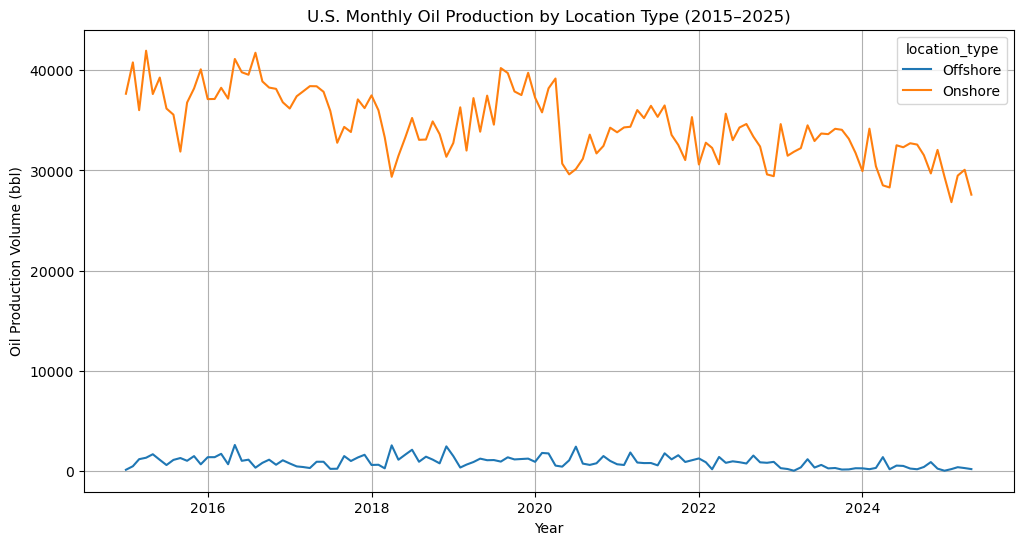

In [26]:
# Converting year_month to timestamp for plotting
location_monthly['year_month'] = location_monthly['year_month'].dt.to_timestamp()

# Plotting monthly oil production by location type
plt.figure(figsize=(12,6))
sns.lineplot(
    data=location_monthly,
    x='year_month',
    y='volume',
    hue='location_type',
    estimator=None
)
plt.title("U.S. Monthly Oil Production by Location Type (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Oil Production Volume (bbl)")
plt.grid(True)
plt.show()

**Insight:**  
The visualization shows a clear pattern of dominance and relative stability for onshore oil production, contrasted with smaller-scale, more volatile offshore production over time. Both production types experience fluctuations, a sharp decline around 2020, and a gradual downward trend from 2022 onward.

**Why it matters:**  
The dominance of onshore production means overall supply trends are largely driven by land-based operations, while higher offshore volatility increases operational risk and uncertainty for long-term production and investment planning.


### Average Annual Decline Rate: Onshore vs Offshore Production (Question 2)

In [27]:
# Annual production by location type
land_yearly = (
    oil_df
    .groupby(["year", "location_type"])["volume"]
    .sum()
    .reset_index()
    .sort_values("year")
)

# Calculate YoY % change within each location type
land_yearly["yoy_pct_change"] = (
    land_yearly
    .groupby("location_type")["volume"]
    .pct_change() * 100
)

# Average annual decline rate
avg_decline = (
    land_yearly
    .groupby("location_type")["yoy_pct_change"]
    .mean()
    .reset_index()
)

avg_decline


,location_type,yoy_pct_change
0,Offshore,-9.748948
1,Onshore,-7.878589


**Insight:**  
Both onshore and offshore oil production exhibit negative average year-over-year growth, confirming a sustained decline across location types. Offshore production declines at a faster average annual rate (approximately −9.7%) compared to onshore production (approximately −7.9%).

**Why it matters:**  
Although onshore production dominates total output, the faster decline rate in offshore production highlights greater vulnerability and risk within offshore operations, while onshore production remains the primary driver of overall supply trends.

### Production Volatility Comparison: Onshore vs Offshore (Question 2)

In [28]:
# Volatility Analysis
volatility = (
    land_yearly
    .groupby("location_type")["volume"]
    .agg(
        mean_production="mean",
        std_production="std"
    )
    .reset_index()
)

# Coefficient of Variation
volatility["coefficient_of_variation"] = (  
    volatility["std_production"] / volatility["mean_production"]
)
volatility

,location_type,mean_production,std_production,coefficient_of_variation
0,Offshore,9859.363636,4601.541574,0.466718
1,Onshore,392482.454545,87148.359536,0.222044


C:\Users\horsh\AppData\Local\Temp\ipykernel_19148\1613605198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


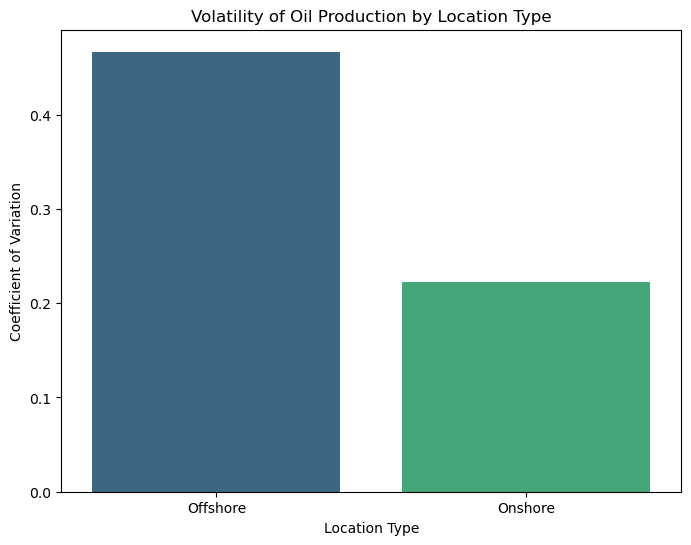

In [29]:
# Visualizing volatility
plt.figure(figsize=(8,6))
sns.barplot(
    data=volatility,
    x='location_type',
    y='coefficient_of_variation',
    palette='viridis'
)
plt.title("Volatility of Oil Production by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Coefficient of Variation")
plt.show()

**Insight:**  
Offshore oil production exhibits substantially higher relative volatility than onshore production, with a coefficient of variation of approximately 0.47 compared to 0.22 for onshore output.

**Why it matters:**  
Higher relative volatility indicates greater uncertainty and operational risk in offshore production, while the lower volatility of onshore output reinforces its role as the more stable and reliable driver of overall oil supply.


### Top Oil-Producing States and Their Impact on Production Trends (Question 3)

This analysis highlights the states with the highest oil output and examines how their performance influences overall production trends, particularly during periods of decline.


In [30]:
# Total production by state
states_total = (
    oil_df
    .groupby(['state'])['volume']
    .sum()
    .reset_index()
    .sort_values('volume', ascending=False)
)

# Identifying top 5 states
top_states = states_total.head(5)

The **top 5 oil-producing states** are:  

- **Colorado (CO)**  
- **Texas (TX)**  
- **Montana (MT)**
- **Oklahoma (OK)**
- **Wyoming (WY)**  

These states are major contributors to **national oil production**, and monitoring their performance is **critical for strategic decision-making**.

### Contribution Share of Top Oil-Producing States (Question 3)


In [31]:
# Annual production volume by states
states_yearly = (
    oil_df
    .groupby(['year', 'state'])['volume']
    .sum()
    .reset_index()
)

# Filtering for top 5 states
top_states_yearly = states_yearly[
    states_yearly['state'].isin(top_states['state'])
]

# Merging to get total annual production for percentage calculation
top_states_yearly = top_states_yearly.merge(
    yearly_oil_clean[['year', 'total_volume']],
    on='year',
    how='left'
)

# Calculating percentage contribution of each state
top_states_yearly['pct_contribution'] = (
    top_states_yearly['volume'] / top_states_yearly['total_volume'] * 100
)
top_states_yearly

,year,state,volume,total_volume,pct_contribution
0,2015,CO,48662.0,463794.0,10.492158
1,2015,MT,63112.0,463794.0,13.607766
2,2015,OK,45433.0,463794.0,9.795944
3,2015,TX,21723.0,463794.0,4.683760
4,2015,WY,60861.0,463794.0,13.122421
5,2016,CO,42437.0,477624.0,8.885023
6,2016,MT,43273.0,477624.0,9.060056
7,2016,OK,44130.0,477624.0,9.239485
8,2016,TX,29320.0,477624.0,6.138720
9,2016,WY,68479.0,477624.0,14.337429


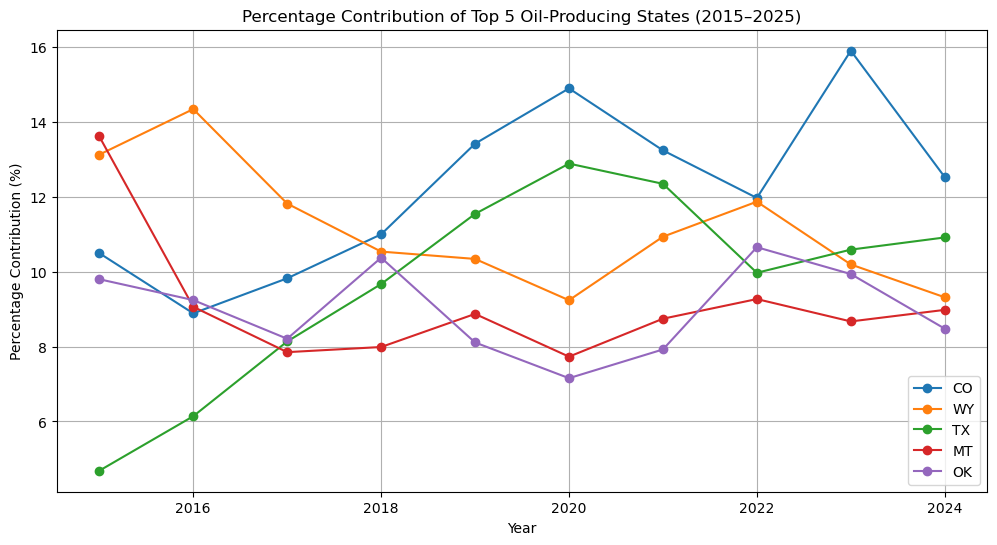

In [32]:
# PLotting the cpntribution of top 5 states over the years
plt.figure(figsize=(12,6))
for state in top_states['state']:
    state_data = top_states_yearly[top_states_yearly['state'] == state]
    plt.plot(
        state_data['year'],
        state_data['pct_contribution'],
        marker='o',
        label=state
    )
plt.title("Percentage Contribution of Top 5 Oil-Producing States (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Percentage Contribution (%)")
plt.legend()
plt.grid(True)
plt.show()

**Insight:**  
The top five oil-producing states contribute unevenly to total U.S. oil production, with Colorado and Wyoming consistently accounting for a larger share across most years. State-level contributions fluctuate over time, indicating shifting production dynamics rather than sustained dominance by a single state.

**Why it matters:**  
Understanding state-level contribution patterns helps policymakers and industry stakeholders assess geographic concentration risk, plan infrastructure and investment strategies, and anticipate how localized disruptions or policy changes may impact overall national oil supply.


## State-Level Production Decline Ranking (Question 3)


In [33]:
# Calculating the percentage change for annual production in each state
states_yearly['yoy_pct_change'] = (
    states_yearly
    .groupby('state')['volume']
    .pct_change() * 100
)

# Calculating the decline rates for each state
state_decline = (
    states_yearly
    .groupby('state')['yoy_pct_change']
    .mean()
    .reset_index()
)
state_decline

,state,yoy_pct_change
0,AK,41.308158
1,AL,-2.419308
2,AR,inf
3,CA,-4.730793
4,CO,-4.442800
5,ID,844.678375
6,IL,-7.423266
7,KS,-2.712691
8,KY,-13.965181
9,LA,-12.043835


**Insight:**  
Average year-over-year production change varies significantly across states, with most major producing states (e.g., CA, CO, MT, OK, WY) exhibiting negative average growth, indicating sustained declines. A small number of states show unusually large positive or infinite values, largely driven by very low initial production levels or irregular reporting rather than sustained growth.

**Why it matters:**  
This analysis highlights that long-term U.S. oil production decline is geographically widespread rather than concentrated in a few states. Identifying where declines are persistent versus where growth signals are distorted by low base effects helps policymakers and investors distinguish structural production trends from statistical noise when evaluating regional energy strategies.


### Evaluating Production Performance Across Land Categories (Question 4)

This analysis assesses how oil production varies across land categories over time, providing insights into stability, volatility, and long-term performance.


In [34]:
land_yearly = (
    oil_df
    .groupby(['land_category', 'year'])['volume']
    .sum()
    .reset_index()
)
land_yearly

,land_category,year,volume
0,Offshore,2015,11740.0
1,Offshore,2016,13541.0
2,Offshore,2017,9325.0
3,Offshore,2018,15328.0
4,Offshore,2019,12347.0
5,Offshore,2020,13236.0
6,Offshore,2021,12275.0
7,Offshore,2022,10928.0
8,Offshore,2023,3812.0
9,Offshore,2024,4977.0


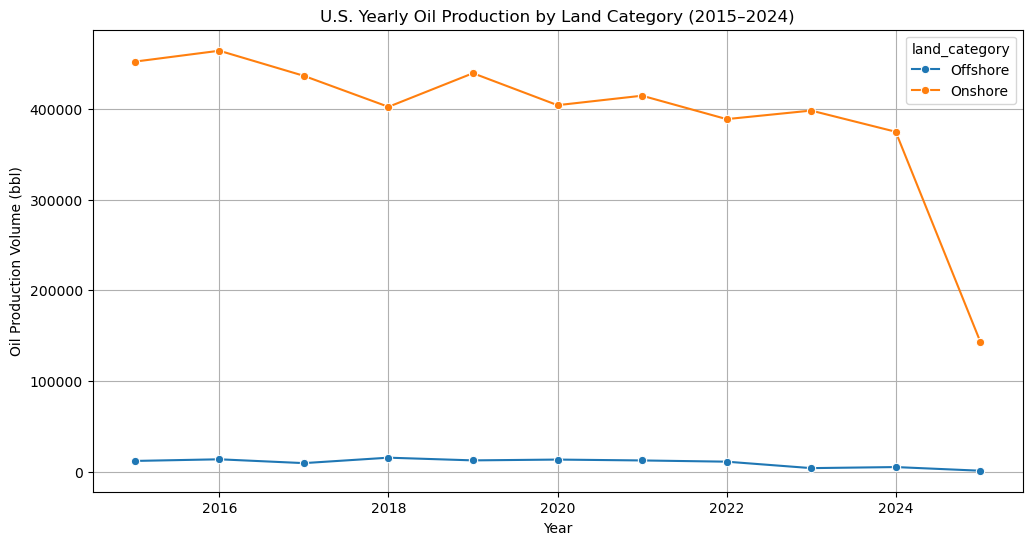

In [35]:
# Plotting the graph for land category oil production over the years
plt.figure(figsize=(12,6))
sns.lineplot(
    data=land_yearly,
    x='year',
    y='volume',
    hue='land_category',
    marker='o'
)
plt.title("U.S. Yearly Oil Production by Land Category (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Oil Production Volume (bbl)")
plt.grid(True)
plt.show()

**Insight:**  
Onshore oil production consistently dominates total output and remains relatively stable over time, while offshore production operates at a much smaller scale and exhibits higher volatility. A decline is observed across both categories in 2025.

**Why it matters:**  
Because overall supply is driven primarily by onshore production, changes in land-based output have the greatest impact on total production levels, while offshore volatility introduces additional operational and planning risk.


## Peak Production and Post-Peak Decline Analysis (Question 4)

In [36]:
# Identifying peak production year
peak_year = (
    yearly_oil_clean[yearly_oil_clean['total_volume'] == yearly_oil_clean['total_volume'].max()]
)
peak_year, volume = peak_year.iloc[0]['year'], peak_year.iloc[0]['total_volume']
print(f"Peak production year: {peak_year} with volume: {volume} bbl")

Peak production year: 2016.0 with volume: 477624.0 bbl


In [37]:
# Post-peak analysis
post_peak = yearly_oil_clean[yearly_oil_clean['year'] > peak_year]

# Post-peak decline rate
post_peak_decline = post_peak[['year','total_volume', 'pct_change']]

# Print post-peak decline rates
print("Post-peak decline rates:")
post_peak_decline

Post-peak decline rates:


,year,total_volume,pct_change
2,2017,445706.0,-6.682663
3,2018,417531.0,-6.321432
4,2019,451639.0,8.168974
5,2020,417271.0,-7.609617
6,2021,426763.0,2.274781
7,2022,399580.0,-6.369577
8,2023,401892.0,0.578608
9,2024,379694.0,-5.523374


**Insight:**  
U.S. oil production peaked in 2016 at approximately 477,624 barrels and has not returned to that level in subsequent years. Post-peak production is characterized by repeated declines interrupted by short-lived recoveries, indicating an overall downward trajectory.

**Why it matters:**  
Identifying a clear peak year provides evidence of a structural shift in U.S. oil production. The persistent inability to surpass the 2016 peak suggests long-term changes in market conditions, resource maturity, and policy direction, which are critical considerations for production planning, investment decisions, and energy transition strategy.

### Implications for Future Energy Planning (Question 5)

The observed decline in U.S. oil production, particularly the sharp drop recorded in 2022,
suggests potential structural challenges rather than short-term fluctuations. The faster
decline in onshore production highlights increasing pressures on conventional production
methods, while offshore production, although more volatile, appears relatively more stable.

Additionally, the concentration of production within a small number of states (notably
Colorado, Texas, and Montana) increases regional dependency risks and exposes national
production levels to localized disruptions.

From a policy and strategic planning perspective, these trends indicate a need for:
- Improved efficiency and recovery techniques in existing oil fields
- Diversification of energy sources to reduce reliance on declining production
- Long-term planning to manage the transition toward more sustainable energy systems

## 6. Preparing Dashboard ready Table

In [42]:
# Total annual oil production
yearly_oil['total_volume'] = yearly_oil['total_volume'].round(2)
yearly_oil['year_on_year_change'] = yearly_oil['year_on_year_change'].abs().round(2)
yearly_oil['pct_change'] = yearly_oil['pct_change'].abs().round(2)
yearly_oil

,year,total_volume,year_on_year_change,pct_change
0,2015,463794.0,NaN,NaN
1,2016,477624.0,13830.0,2.98
2,2017,445706.0,31918.0,6.68
3,2018,417531.0,28175.0,6.32
4,2019,451639.0,34108.0,8.17
5,2020,417271.0,34368.0,7.61
6,2021,426763.0,9492.0,2.27
7,2022,399580.0,27183.0,6.37
8,2023,401892.0,2312.0,0.58
9,2024,379694.0,22198.0,5.52


In [43]:
# Annual oil production with complete years only
yearly_oil_clean['year_on_year_change'] = yearly_oil_clean['year_on_year_change'].abs().round(2)
yearly_oil_clean['pct_change'] = yearly_oil_clean['pct_change'].abs().round(2)
yearly_oil_clean

C:\Users\horsh\AppData\Local\Temp\ipykernel_19148\2677958386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_oil_clean['year_on_year_change'] = yearly_oil_clean['year_on_year_change'].abs().round(2)
C:\Users\horsh\AppData\Local\Temp\ipykernel_19148\2677958386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_oil_clean['pct_change'] = yearly_oil_clean['pct_change'].abs().round(2)


,year,total_volume,year_on_year_change,pct_change
0,2015,463794.0,NaN,NaN
1,2016,477624.0,13830.0,2.98
2,2017,445706.0,31918.0,6.68
3,2018,417531.0,28175.0,6.32
4,2019,451639.0,34108.0,8.17
5,2020,417271.0,34368.0,7.61
6,2021,426763.0,9492.0,2.27
7,2022,399580.0,27183.0,6.37
8,2023,401892.0,2312.0,0.58
9,2024,379694.0,22198.0,5.52


In [44]:
# Total oil production by state with percentage contribution
states_total['contribution_pct'] = (
    states_total['volume'] / states_total['volume'].sum() * 100
).round(2)
states_total

,state,volume,contribution_pct
4,CO,539295.0,12.70
26,WY,494212.0,11.64
22,TX,424626.0,10.00
12,MT,402170.0,9.47
19,OK,398214.0,9.38
9,LA,266921.0,6.29
15,NM,248583.0,5.86
11,MS,193738.0,4.56
23,UT,188865.0,4.45
3,CA,166100.0,3.91


In [46]:
# Annual oil production by state with percentage contribution
states_yearly['yearly_contribution_pct'] = (
    states_yearly['volume'] / 
    states_yearly.groupby('year')['volume'].transform('sum') * 100
).round(2)
states_yearly['volume'] = states_yearly['volume'].round(2)
states_yearly['yoy_pct_change'] = states_yearly['yoy_pct_change'].abs().round(2)
states_yearly

,year,state,volume,yoy_pct_change,yearly_contribution_pct
0,2015,AK,2675.0,NaN,0.60
1,2015,AL,10438.0,NaN,2.36
2,2015,AR,1.0,NaN,0.00
3,2015,CA,18522.0,NaN,4.19
4,2015,CO,48662.0,NaN,11.01
...,...,...,...,...,...
290,2025,TX,14609.0,64.74,10.37
291,2025,UT,3079.0,62.76,2.19
292,2025,VA,0.0,NaN,0.00
293,2025,WV,0.0,NaN,0.00


In [47]:
# Annual oil production by land category with percentage share
land_yearly['share_pct'] = (
    land_yearly['volume'] / 
    land_yearly.groupby('year')['volume'].transform('sum') * 100
).round(2)
land_yearly

,land_category,year,volume,share_pct
0,Offshore,2015,11740.0,2.53
1,Offshore,2016,13541.0,2.84
2,Offshore,2017,9325.0,2.09
3,Offshore,2018,15328.0,3.67
4,Offshore,2019,12347.0,2.73
5,Offshore,2020,13236.0,3.17
6,Offshore,2021,12275.0,2.88
7,Offshore,2022,10928.0,2.73
8,Offshore,2023,3812.0,0.95
9,Offshore,2024,4977.0,1.31


In [48]:
# Production volatility analysis
volatility

,location_type,mean_production,std_production,coefficient_of_variation
0,Offshore,9859.363636,4601.541574,0.466718
1,Onshore,392482.454545,87148.359536,0.222044


## 7. Exporting the tables

In [49]:
with pd.ExcelWriter('../data/cleaned_data/oil_production_dashboard_tables.xlsx', engine='xlsxwriter') as writer:
    yearly_oil.to_excel(writer, sheet_name='Yearly Oil Production', index=False)
    yearly_oil_clean.to_excel(writer, sheet_name='Yearly Oil Production Cleaned', index=False)
    states_total.to_excel(writer, sheet_name='State Totals', index=False)
    states_yearly.to_excel(writer, sheet_name='State-Year', index=False)
    land_yearly.to_excel(writer, sheet_name='Land Category-Year', index=False)
    volatility.to_excel(writer, sheet_name='Volatility', index=False)

## Key Insights

- U.S. oil production reached its peak in 2016 and has remained below this level since, indicating a long-term structural shift rather than a temporary downturn.
- Production trends are characterized by recurring declines with only brief and partial recoveries, reinforcing the presence of sustained contraction.
- Onshore oil production remains the dominant and more stable source of supply, while offshore production operates at a smaller scale with significantly higher relative volatility.
- Most major oil-producing states exhibit negative average year-over-year growth, suggesting that production decline is geographically widespread rather than isolated.
- State-level contributions to total production fluctuate over time, indicating shifting regional dynamics and the absence of sustained dominance by a single producing state.
- Volatility and decline patterns intensified around periods of global disruption, particularly in 2020, with no full recovery in subsequent years.

## Conclusion

This analysis demonstrates that U.S. oil production is undergoing a prolonged structural decline following its 2016 peak. The combination of widespread state-level contractions, higher volatility in offshore production, and the inability to achieve sustained post-peak recovery suggests that recent trends are driven by long-term factors rather than short-term market cycles. These findings have important implications for energy policy, investment strategy, and infrastructure planning, particularly as the industry navigates increasing uncertainty, evolving regulations, and the broader transition toward alternative energy sources.